# Exercise 2 B

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import statsmodels.api as sm

In [2]:
df = pd.read_excel('traveldata.xlsx')

In [3]:
df

,Miles Traveled,Number of Deliveries,Gas Price,Travel Time
0,89,4,3.84,7.0
1,66,1,3.19,5.4
2,78,3,3.78,6.6
3,111,6,3.89,7.4
4,44,1,3.57,4.8
5,77,3,3.57,6.4
6,80,3,3.03,7.0
7,66,2,3.51,5.6
8,109,5,3.54,7.3
9,76,3,3.25,6.4


## A. Correlation

### Check the relationships between each independent variable and the dependent variable using scatterplots and correlations.

1. Create scatter plot between miles traveled and travel time

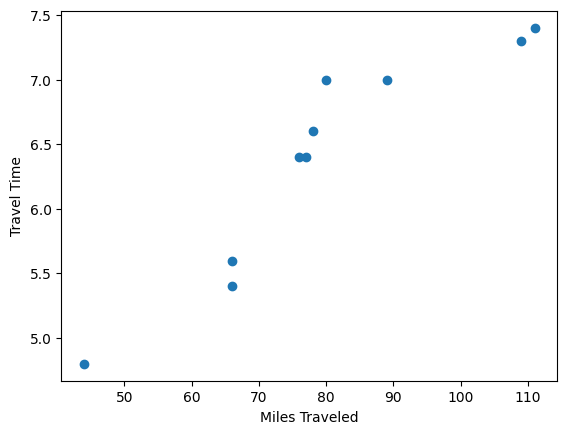

In [4]:
plt.scatter(df["Miles Traveled"],
            df["Travel Time"])
plt.xlabel("Miles Traveled")
plt.ylabel("Travel Time")
plt.show()

2. Create scatter plot between number of deliveries and travel time

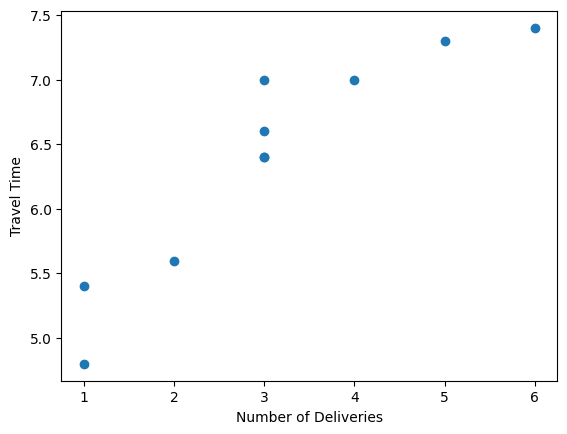

In [6]:
plt.scatter(df["Number of Deliveries"],
            df["Travel Time"])
plt.xlabel("Number of Deliveries")
plt.ylabel("Travel Time")
plt.show()

3. Create scatter plot between Gas Price and Travel time

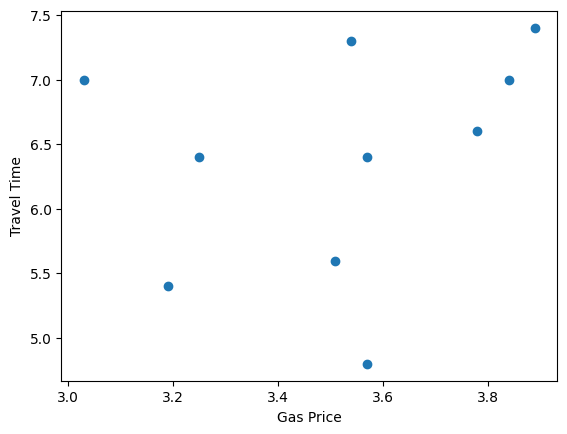

In [7]:
plt.scatter(df["Gas Price"],
            df["Travel Time"])
plt.xlabel("Gas Price")
plt.ylabel("Travel Time")
plt.show()

4. Create a pairplot

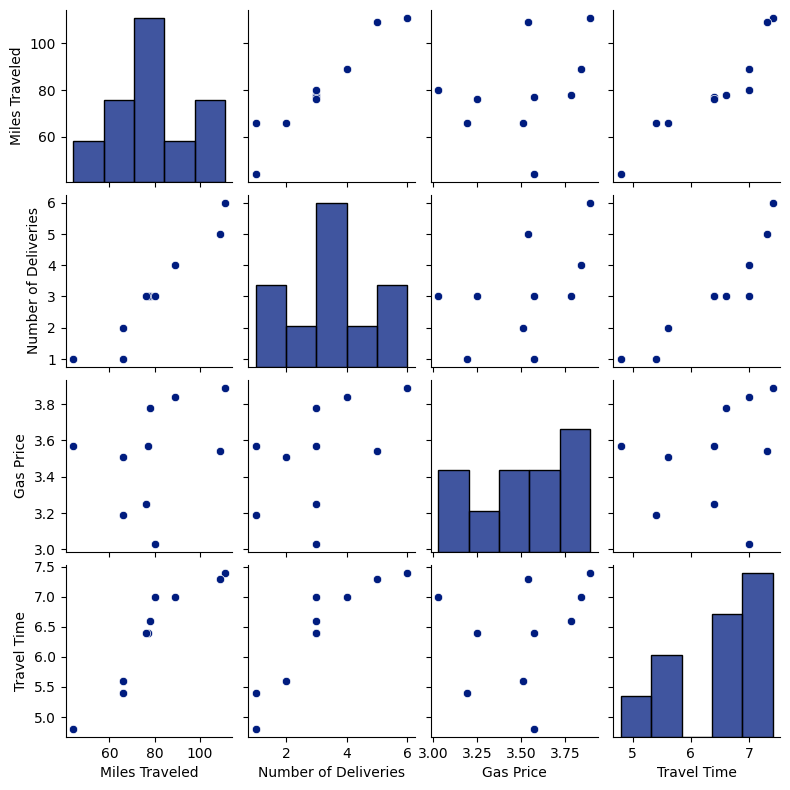

In [18]:
sns.set_palette('dark')
sns.pairplot(data=df, height=2)

5. Calculate correlation coefficient and p-value between Miles Traveled and Travel Time

In [19]:
result = pearsonr(df['Miles Traveled'], df['Travel Time'])
print("Miles Traveled and Travel Time")
print("correlation coefficient:", result[0])
print("p-value:", result[1])

Miles Traveled and Travel Time
correlation coefficient: 0.928178500887476
p-value: 0.00010667565429896801


6. Calculate correlation coefficient and p-value between Number of Deliveries and Travel Time

In [21]:
result = pearsonr(df['Number of Deliveries'], df['Travel Time'])
print("Number of Deliveries and Travel Time")
print("correlation coefficient:", result[0])
print("p-value:", result[1])

Number of Deliveries and Travel Time
correlation coefficient: 0.9164433964470268
p-value: 0.00019260878342962958


7. Calculate correlation coefficient and p-value between Gas Price and Travel Time

In [22]:
result = pearsonr(df['Gas Price'], df['Travel Time'])
print("Gas Price and Travel Time")
print("correlation coefficient:", result[0])
print("p-value:", result[1])

Gas Price and Travel Time
correlation coefficient: 0.2672115310193847
p-value: 0.45545341268508155


### Check the relationships among the independent variables using scatterplots and correlations.

8. Create scatter plot between Miles Traveled and Number of Deliveries.

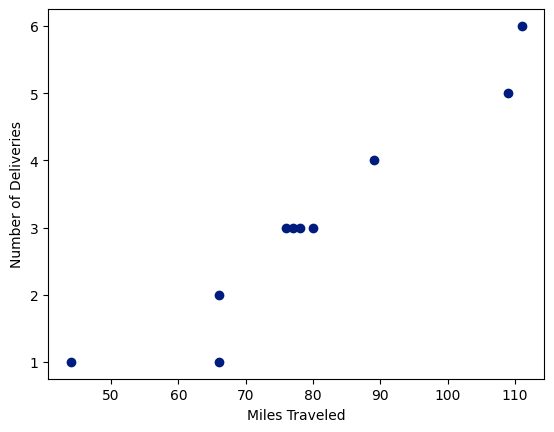

In [23]:
plt.scatter(df["Miles Traveled"],
            df["Number of Deliveries"])

plt.xlabel("Miles Traveled")
plt.ylabel("Number of Deliveries")
plt.show()

9. Create scatter plot between Miles traveled and Gas Price

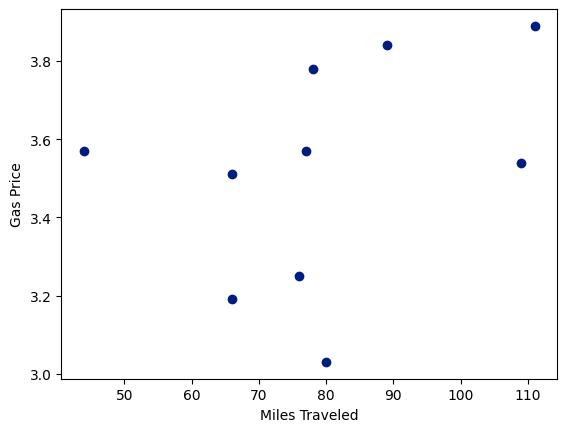

In [24]:
plt.scatter(df["Miles Traveled"],
            df["Gas Price"])

plt.xlabel("Miles Traveled")
plt.ylabel("Gas Price")
plt.show()

10. Create scatter plot between Number of Deliveries and Gas Price

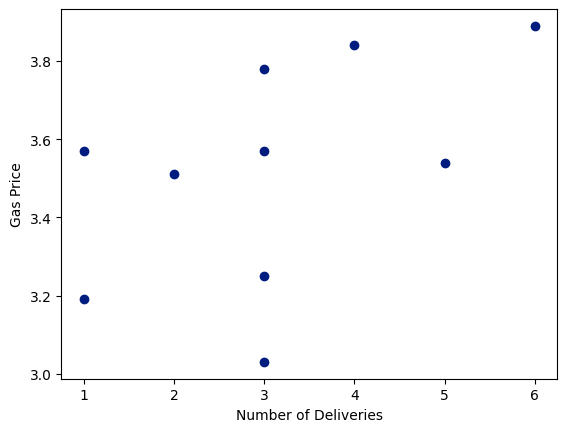

In [25]:
plt.scatter(df["Number of Deliveries"],
            df["Gas Price"])

plt.xlabel("Number of Deliveries")
plt.ylabel("Gas Price")
plt.show()

**subplots**

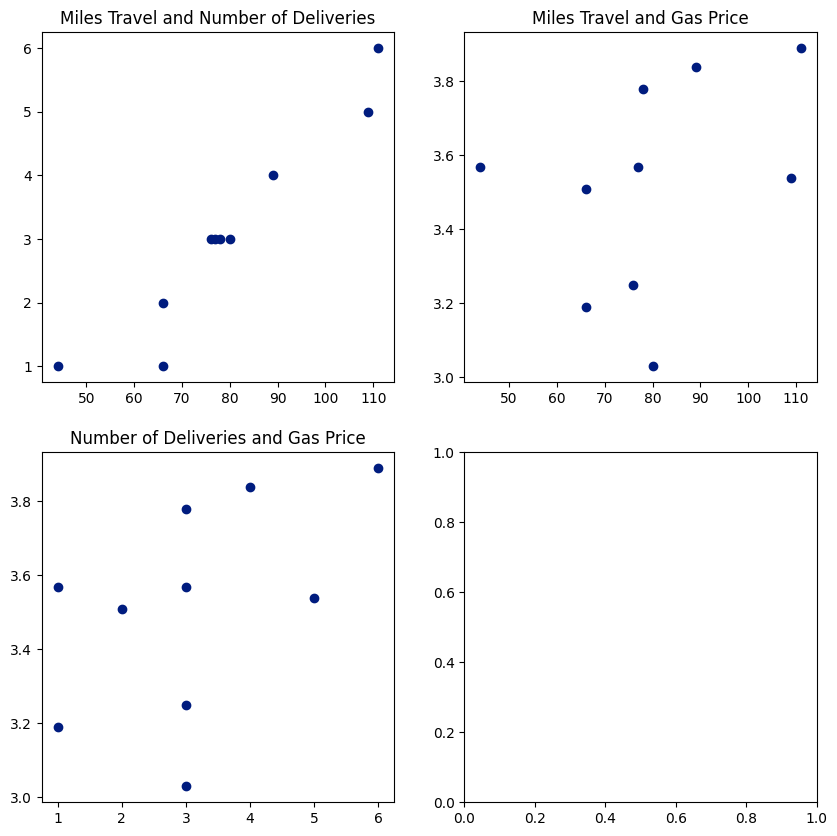

In [26]:
ig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0, 0].scatter(df["Miles Traveled"], df["Number of Deliveries"])
ax[0, 1].scatter(df["Miles Traveled"], df["Gas Price"])
ax[1, 0].scatter(df["Number of Deliveries"], df["Gas Price"])

ax[0, 0].set_title("Miles Travel and Number of Deliveries")
ax[0, 1].set_title("Miles Travel and Gas Price")
ax[1, 0].set_title("Number of Deliveries and Gas Price")
plt.show()

11. Calculate r-squared and p-value between Miles Traveled and Number of Deliveries

In [28]:
result = pearsonr(df['Miles Traveled'], df['Number of Deliveries'])
print("Miles Traveled and Number of Deliveries")
print("correlation coefficient:", result[0])
print("p-value:", result[1])

Miles Traveled and Number of Deliveries
correlation coefficient: 0.9558982066200347
p-value: 1.5690314407660616e-05


12. Calculate r-squared and p-value between Miles Traveled and Gas Price

In [29]:
result = pearsonr(df['Miles Traveled'], df['Gas Price'])
print("Miles Traveled and Gas Price")
print("correlation coefficient:", result[0])
print("p-value:", result[1])

Miles Traveled and Gas Price
correlation coefficient: 0.35579623354708517
p-value: 0.31296405908178965


13. Calculate r-squared and p-value between Number of Deliveries and Gas Price

In [30]:
result = pearsonr(df['Number of Deliveries'], df['Gas Price'])
print("Number of Deliveries and Gas Price")
print("correlation coefficient:", result[0])
print("p-value:", result[1])

Number of Deliveries and Gas Price
correlation coefficient: 0.4982421647401633
p-value: 0.142741207670319


### Correlation Summary

14. Create the correlation summary

In [31]:
correlation = df.corr()
correlation

,Miles Traveled,Number of Deliveries,Gas Price,Travel Time
Miles Traveled,1.000000,0.955898,0.355796,0.928179
Number of Deliveries,0.955898,1.000000,0.498242,0.916443
Gas Price,0.355796,0.498242,1.000000,0.267212
Travel Time,0.928179,0.916443,0.267212,1.000000


15. Create a correlation matrix

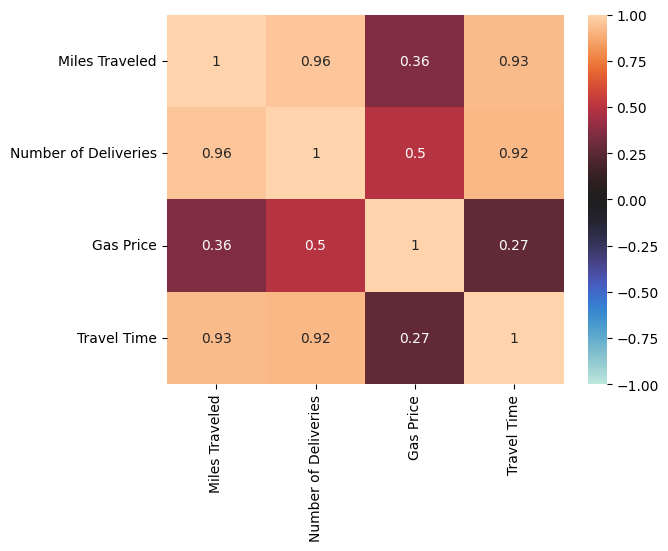

In [32]:
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

## Building Different Regression Models

Find the best regression model

16. Set independent and dependent variables

In [39]:
X = df[['Miles Traveled', 'Number of Deliveries','Gas Price']]
X = sm.add_constant(X)
y = df['Travel Time']

17. Build and train the model

In [40]:
mlr_model = LinearRegression()

mlr_model.fit(X, y)

y_pred = mlr_model.predict(X)
print('Intercept:', mlr_model.intercept_)
print('Coefficients:', mlr_model.coef_)

Intercept: 6.211377663979402
Coefficients: [ 0.          0.01412189  0.38315024 -0.60655271]


18. Display the statistical summary

In [41]:
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Travel Time   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     16.99
Date:                Fri, 29 Aug 2025   Prob (F-statistic):            0.00245
Time:                        06:57:10   Log-Likelihood:               -0.98426
No. Observations:                  10   AIC:                             9.969
Df Residuals:                       6   BIC:                             11.18
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.2114      2.321      2.677      0.037       0.533      11.890
Miles Traveled           0.0141      0.022      0.636      0.548      -0.040       0.068
Number of Deliveries     0.3832      0.300      1.277      0.249      -0.351       1.117
Gas Price               -0.6066      0.527     -1.152      0.293      -1.895       0.682
==============================================================================
Omnibus:                        2.874   Durbin-Watson:                   2.406
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.204
Skew:                           0.457   Prob(JB):                        0.548
Kurtosis:                       1.567   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
19. Display the r-squared

SyntaxError: invalid syntax (ipython-input-760769706.py, line 1)

In [43]:
olsmod.rsquared

np.float64(0.8946842692569462)